# Lecture1 はじめに
2022.4岩政

ここでは、講義における、python実行環境について説明します
- 実行形式：jupyter notebookを用いたpythonのインタラクティブな実行
- 実行環境：google colabratoryを使い、所定のnotebookを自分のドライブにコピーして利用

最初に実行環境を確認します。そして、notebookを使った、テキスト(markidown)やコード(python)の記述方法について学びます、最後に、データサイエンスの実例を通して、pythonのライブラリを使いながら、インタラクティブにデータの分析や操作、可視化を行う様子を示します。実例に関しては以下を参考にしています。

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

## pythonの実行環境の準備(google colab)

このファイルを開いたら、ドライブにコピーを押すことにより、自分のgoogle colaboratry環境にnotebookがコピーされます
<div>
<img src="https://github.com/miwamasa/DataScience2022/blob/main/notebooks/figures/colab_drive_copy.png?raw=true" width="500"/>
</div

## notebookの使い方
- .ipynbファイル、python noteboolファイルであることを表します。
- notebook interfaceについて
- cells
  - コードcell: pythonコードを含むcell
  - markdown cell(「テキスト」cell):マークダウン形式のテキスト入力cell
  - cellへの入力後は、Ctr+enter にてこれを実行できる

## コードcellの使い方

In [ ]:
# コードcellでは、コメントは'#'から始まる行です
# コードcellでは、pythonの実行環境がうごきます、Ctr+enterを押すか、左端に見えるプレイボタンを使うか
1233+222

1455

### Python basics




In [37]:
# pythonの組み込み関数(print等)が直接使えます
print('Hello World!')

Hello World!


#### いくつかの簡単な注意
- インデント（空白やタブ）に注意

In [14]:
for i in range(4):
  print(i)

0
1
2
3


In [15]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Tim')

'Hello, Tim!'

## Markdownの書き方
- テキストcellにはmarkdown形式で入力することができます。
- Colaboratoryを使っていると、テキストcellの上に、テキストフォーマットのメニューが出ます。これらを使ってmarkdown記法を試すことができます。（例：**太字**)

# level 1 の見出しです

## level 2 見出しです

プレーン（普通の）テキストを入力することができます。 テキストに対して装飾 **太字** and __別の太字__, あるいは *italic* とか _italic_　とかを施せます 

パラグラフは、必ず「空行」で区切りをつけます。

* リストは'*'を使います
 * インデント(空白を行頭に挟む）をつけると、階層リストになります。

1. 番号付きリストをかくここともできる. 
2. 番号は勝手に更新されます

[リンクを張ることもできます](https://aiit.ac.jp/)

インラインコードは バッククオート(')でくくります: `foo()`, コードブロックを入れるときはバッククオートを３連続します: 
```
bar()
``` 
あるいは、行頭に４つ空白をつけてもコードブロックになります。: 

    foo()
    
画像もこのように晴れます: ![Alt text](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Kernelとは
Kernelは、notebookの背後にある、pythonスクリプトの評価エンジンです。１つのnotebook(.ipynbファイルの単位)で、変数へのデータ格納状況や、関数定義などを、記憶し、逐次的に（上のセルから下載せるに）


### パッケージの導入
pythonではnumpy(数値計算用),pandas(data処理用),scikitlern(機械学習用)などのパッケージを利用します。import文を用います。importできないときは、kernelで指定したpythonの実行環境にそのパッケージがインストールされていない可能性があります

この場合は、コードcellで、以下のように行頭に!を追加して、pythonパッケージのインストールを行います。

> !pip install numpy

In [22]:
!pip install numpy

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


numpy(数値計算用)を利用します。

In [23]:
import numpy as np
def square(x):
    return x * x

In [17]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

7 squared is 49


In [18]:
print('Is %d squared %d?' % (x, y))

Is 7 squared 49?


In [19]:
y = 10
print('Is %d squared is %d?' % (x, y))

Is 7 squared is 10?


## notebookを使ったデータ解析の例
- notebookから データ解析でよく使うpandas（データ処理),matplotlib(グラフ描画),seabon(きれいな絵)パッケージをimportしてこれを表示します。(これらのパッケージはColab環境では最初からインストールされてます)

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pandasを使ってFortune500データをDataFrameに読み込みます

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/miwamasa/DataScience2022/main/notebooks/data/fortune500.csv')

DataFrame dfの最初だけ表示、コラム名が見えます

In [32]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [22]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


ここでコラム名を、強制的に変更します(かっことかあってめんどくさいので)

In [33]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

何行あるかはlenで数えます

In [34]:
len(df)

25500

各々のコラムのデータ型を見てみましょう

In [35]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

むむ、コラム=proftがflot64のはずなのに、型がきまってません(object)、数字じゃないものがはいっているのか見てみます。

dfのコラム=profitを文字列としたときに、数値でないものを服っているものを、検索します。検索した結果は、行のindex番号のリストになります。

In [36]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [38]:
df.profit[non_numberic_profits]

228      N.A.
290      N.A.
294      N.A.
296      N.A.
352      N.A.
         ... 
24242    N.A.
24296    N.A.
24435    N.A.
24489    N.A.
25485    N.A.
Name: profit, Length: 369, dtype: object

最初の５行を見てみると、値が"N.A."(Not Availale)なものが複数みつかりました。さてNA意外にどのような値がふくまれているのか、set関数で、値の集合を得ます

In [27]:
set(df.profit[non_numberic_profits])

{'N.A.'}

N.Aのみでした。では何個ある？

In [28]:
len(df.profit[non_numberic_profits])

369

N.Aの数はせいぜい全体の1.5%。もし、N.Aの分布が偏ってなければ無視してよいことんいなるので、N.Aの分布を、コラム=yearをx軸にした、ヒストグラムで見てみます。

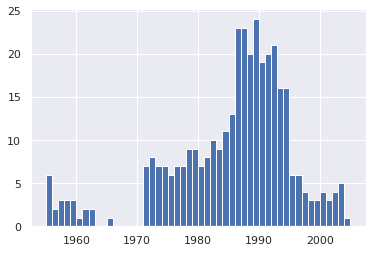

In [29]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

まあ、気にすることもないので、NAをコラム=profitに含む行をすべてを、抜いた新しいDataframeを作ります。そして、profitのデータ型を数値型に変換します（もともと型なしで読み込まれていたので変換が必要）

In [39]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

C:\Users\miwam\AppData\Local\Temp\ipykernel_23936\3797335716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.profit = df.profit.apply(pd.to_numeric)


In [40]:
len(df)

25131

In [41]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

### Matplotlibを使った可視化の例

引きつき、fortun500のデータで分析を進めます。まずは、年度year毎にグループ化します。そしてグループ(year)毎に平均をとってプロットします

In [42]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

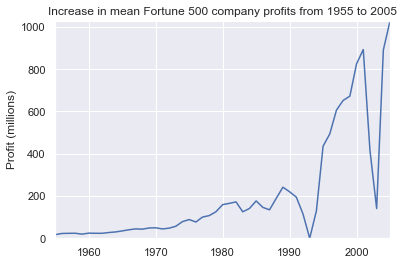

In [43]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

それでは、コラム=revenueはどうなっているでしょうか？

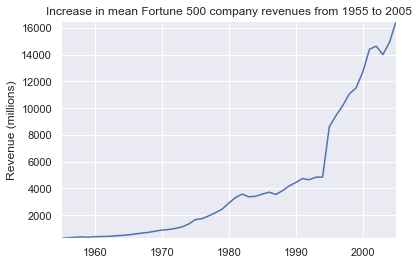

In [45]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

それでは、profit,revenewを平均だけでなくて標準偏差を合わせてプロとしてみます。

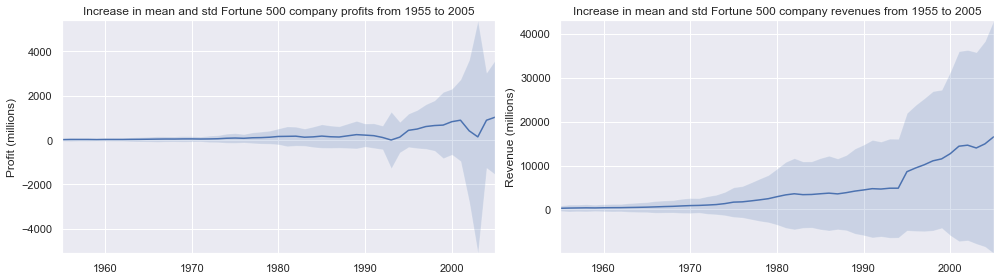

In [46]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

年とともに、標準偏差も広がっていくことがわかります。